In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
pd.set_option('display.max_columns',None)
raw_data= pd.read_csv('marketing_data.csv')
print(raw_data.shape)
raw_data.head()

(2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
raw_data['Dt_Customer'].min()

'2012-07-30'

In [5]:
raw_data['Dt_Customer'].max()

'2014-06-29'

In [6]:
raw_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
#Checking the unique values in the dataset
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    number_values = len(unique_values)
    if number_values < 10:
        print('The number of values for feature {}:{} == {}'.format(column, number_values, unique_values))
    else:
        print('The number of values for feature {}:{}'.format(column, number_values))

The number of values for feature ID:2240
The number of values for feature Year_Birth:59
The number of values for feature Education:5 == ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
The number of values for feature Marital_Status:8 == ['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
The number of values for feature  Income :1975
The number of values for feature Kidhome:3 == [0 1 2]
The number of values for feature Teenhome:3 == [0 1 2]
The number of values for feature Dt_Customer:663
The number of values for feature Recency:100
The number of values for feature MntWines:776
The number of values for feature MntFruits:158
The number of values for feature MntMeatProducts:558
The number of values for feature MntFishProducts:182
The number of values for feature MntSweetProducts:177
The number of values for feature MntGoldProds:213
The number of values for feature NumDealsPurchases:15
The number of values for feature NumWebPurchases:15
The number of values for fea

In [8]:
# Check unique values in the Education column
raw_data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [9]:
raw_data.rename(columns={' Income ': 'Income'}, inplace=True)

raw_data = raw_data.dropna(subset=['Income'])

In [10]:
raw_data['Dt_Customer'] = pd.to_datetime(raw_data['Dt_Customer'])

In [11]:
# Assuming raw_data is your DataFrame
Current_Year = datetime.datetime.now().year

# Creating the Customer_Age column
raw_data['Customer_Age'] = Current_Year - raw_data['Year_Birth']

# Dropping rows where Customer_Age is greater than 100
raw_data = raw_data[raw_data['Customer_Age'] <= 100]

# Dropping the Year_Birth column since it's no longer needed
raw_data.drop('Year_Birth', axis=1, inplace=True)

# Optional: Check the minimum and maximum ages after cleaning
print("Min Age:", raw_data['Customer_Age'].min())
print("Max Age:", raw_data['Customer_Age'].max())


Min Age: 28
Max Age: 84


In [12]:
#Creating Customer enrollment days column
raw_data['Customer_Enrollment_Days'] = (datetime.datetime.now() - raw_data['Dt_Customer']).dt.days
raw_data.drop('Dt_Customer', axis=1, inplace=True)

In [13]:
# Mapping Marital_Status to 1 for singles and 2 for couples
marital_map = {
    'Absurd': 1, 
    'Alone': 1, 
    'YOLO': 1, 
    'Single': 1,
    'Married': 2, 
    'Together': 2, 
    'Widow': 1, 
    'Divorced': 1
}

# Apply the mapping to the Marital_Status column
raw_data['Marital_Status_Mapped'] = raw_data['Marital_Status'].map(marital_map)

# Create Num_Kids by adding Kidhome and Teenhome
raw_data['Num_Kids'] = raw_data['Kidhome'] + raw_data['Teenhome']

# Create Fam_Size by summing the mapped Marital_Status and Num_Kids
raw_data['Family_Size'] = raw_data['Marital_Status_Mapped'] + raw_data['Num_Kids']

raw_data.drop(columns=['Marital_Status', 'Kidhome', 'Teenhome','Num_Kids'], inplace=True)


In [14]:
# Calculating the total amount spent on all items
raw_data['MntTotal'] = (raw_data['MntWines'] +
                             raw_data['MntFruits'] +
                             raw_data['MntMeatProducts'] +
                             raw_data['MntFishProducts'] +
                             raw_data['MntSweetProducts'] +
                             raw_data['MntGoldProds'])


In [15]:
# Create TotalPurchases by summing up various purchase types
raw_data['TotalPurchases'] = (raw_data['NumDealsPurchases'] +
                                   raw_data['NumWebPurchases'] +
                                   raw_data['NumCatalogPurchases'] +
                                   raw_data['NumStorePurchases'])


In [16]:
# Create Num_Accepted feature by summing up the columns for accepted campaigns
raw_data['Num_Accepted'] = (raw_data['AcceptedCmp1'] + 
                            raw_data['AcceptedCmp2'] + 
                            raw_data['AcceptedCmp3'] + 
                            raw_data['AcceptedCmp4'] + 
                            raw_data['AcceptedCmp5'])
# Segment customers based on campaign acceptance
raw_data['Campaign_Engagement'] = raw_data['Num_Accepted'].apply(
    lambda x: 'Highly Engaged' if x > 3 else 'Moderately Engaged' if x > 1 else 'Not Engaged'
)
raw_data['Campaign_Engagement'] = raw_data['Campaign_Engagement'].astype(str)

# Drop the unnecessary features from the original dataset
raw_data.drop(['AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                   axis=1, inplace=True)

# Display the first few rows to check the result
raw_data.head()


,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Customer_Age,Customer_Enrollment_Days,Marital_Status_Mapped,Family_Size,MntTotal,TotalPurchases,Num_Accepted,Campaign_Engagement
0,1826,Graduation,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,Spain,54,3774,1,1,1190,15,0,Not Engaged
1,1,Graduation,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,Canada,63,3775,1,1,577,18,1,Not Engaged
2,10476,Graduation,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,0,0,USA,66,3808,2,3,251,11,0,Not Engaged
3,1386,Graduation,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,0,0,Australia,57,3810,2,4,11,4,0,Not Engaged
4,5371,Graduation,21474.0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,Spain,35,3843,1,2,91,8,1,Not Engaged


In [17]:
#Checking the unique values in the dataset
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    number_values = len(unique_values)
    if number_values < 10:
        print('The number of values for feature {}:{} == {}'.format(column, number_values, unique_values))
    else:
        print('The number of values for feature {}:{}'.format(column, number_values))

The number of values for feature ID:2213
The number of values for feature Education:5 == ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
The number of values for feature Income:1971
The number of values for feature Recency:100
The number of values for feature MntWines:775
The number of values for feature MntFruits:158
The number of values for feature MntMeatProducts:553
The number of values for feature MntFishProducts:182
The number of values for feature MntSweetProducts:176
The number of values for feature MntGoldProds:212
The number of values for feature NumDealsPurchases:15
The number of values for feature NumWebPurchases:15
The number of values for feature NumCatalogPurchases:14
The number of values for feature NumStorePurchases:14
The number of values for feature NumWebVisitsMonth:16
The number of values for feature Response:2 == [0 1]
The number of values for feature Complain:2 == [0 1]
The number of values for feature Country:8 == ['Australia' 'Canada' 'Germany' 'India' 'Mexico

In [18]:
response_counts = raw_data['Response'].value_counts()

# Calculate the percentage
total_responses = response_counts.sum()
response_percentages = (response_counts / total_responses) * 100

# Display the results
print('Percentage of Responses:')
print('------------------------')
for response, percentage in response_percentages.items():
    print(f'Response {response}: {percentage:.2f}%')

Percentage of Responses:
------------------------
Response 0: 84.95%
Response 1: 15.05%


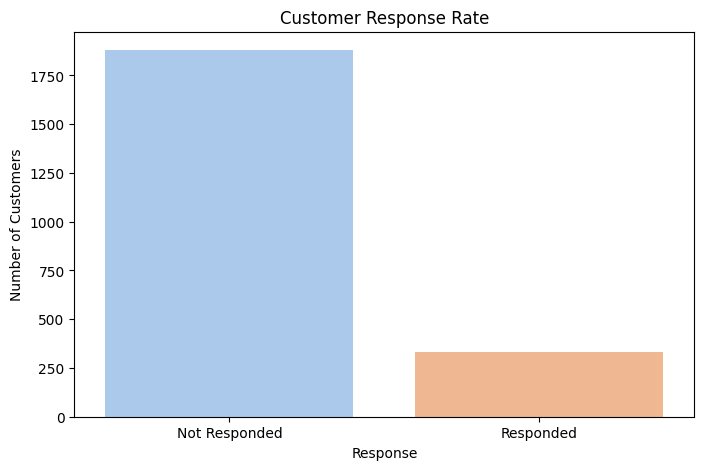

In [19]:
response_counts = raw_data['Response'].value_counts()
response_counts.index = ['Not Responded', 'Responded']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=response_counts.index, y=response_counts.values, palette='pastel')
plt.title('Customer Response Rate')
plt.ylabel('Number of Customers')
plt.xlabel('Response')
plt.show()

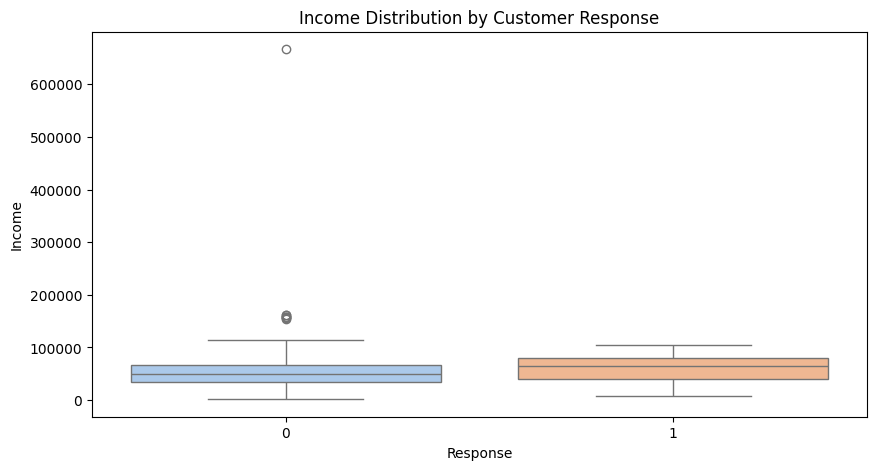

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Response', y='Income', data=raw_data, palette='pastel')
plt.title('Income Distribution by Customer Response')
plt.ylabel('Income')
plt.xlabel('Response')
plt.show()

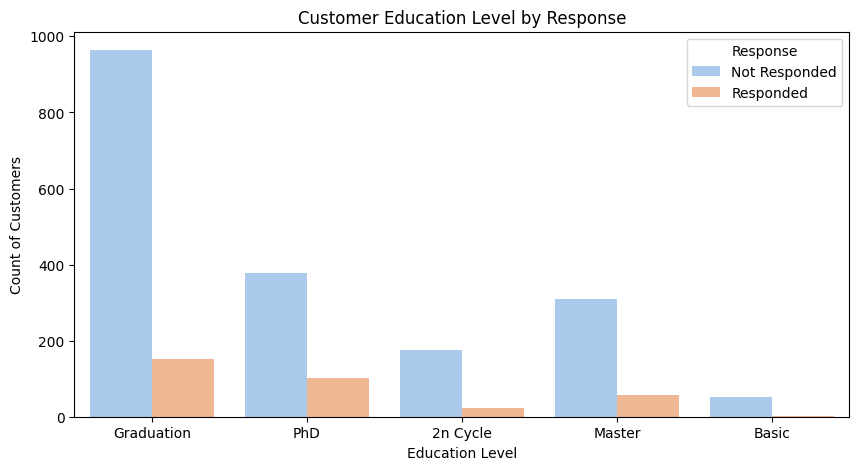

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', hue='Response', data=raw_data, palette='pastel')
plt.title('Customer Education Level by Response')
plt.ylabel('Count of Customers')
plt.xlabel('Education Level')
plt.legend(title='Response', loc='upper right', labels=['Not Responded', 'Responded'])
plt.show()

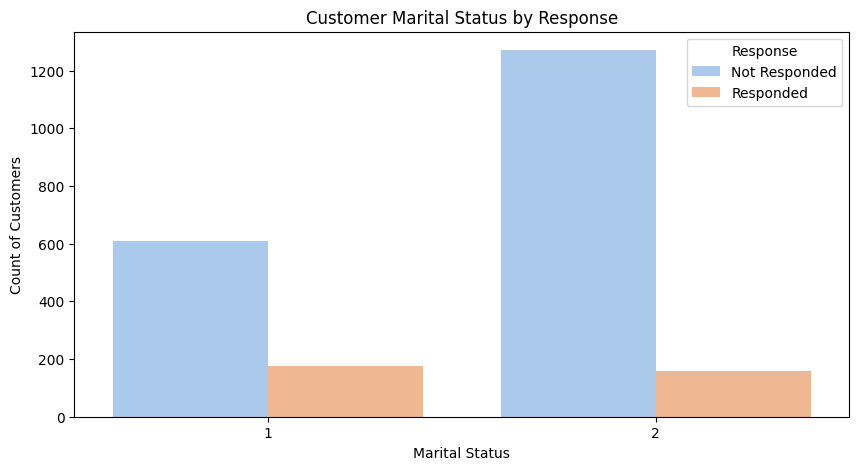

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status_Mapped', hue='Response', data=raw_data, palette='pastel')
plt.title('Customer Marital Status by Response')
plt.ylabel('Count of Customers')
plt.xlabel('Marital Status')
plt.legend(title='Response', loc='upper right', labels=['Not Responded', 'Responded'])
plt.show()

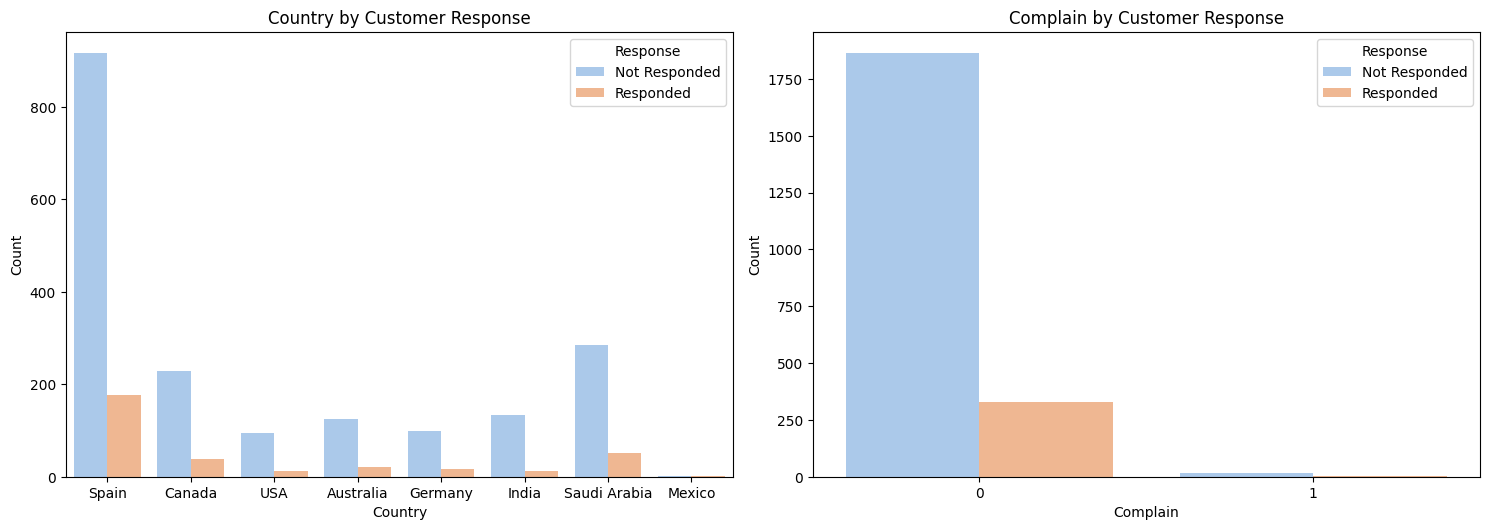

In [23]:
# List of categorical features
categorical_features = ['Country', 'Complain']

# Create count plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)  # Arrange plots in a grid
    sns.countplot(x=feature, hue='Response', data=raw_data, palette='pastel')
    plt.title(f'{feature} by Customer Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Response', loc='upper right', labels=['Not Responded', 'Responded'])

plt.tight_layout()
plt.show()

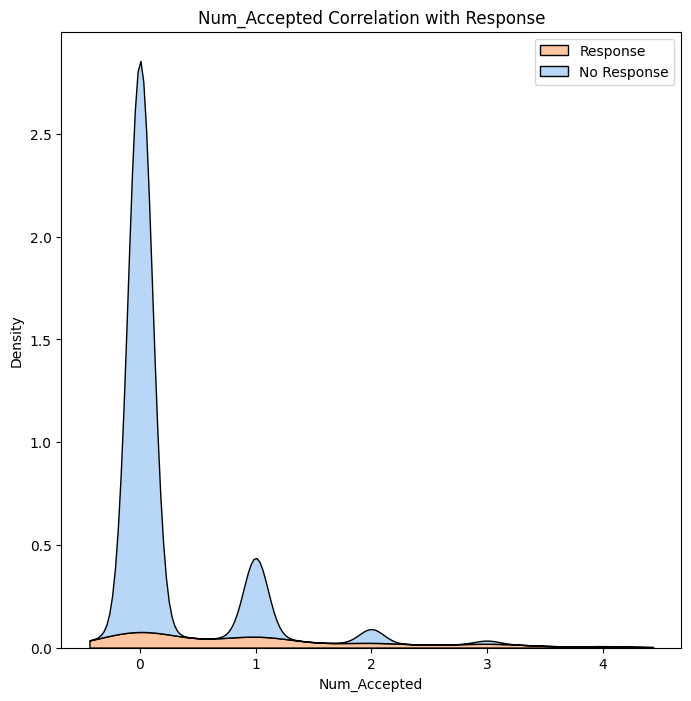

Correlation % for Num_Accepted: 42.73%
------------------------------------------------------------------------
count    2213.000000
mean        0.298238
std         0.679446
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Num_Accepted, dtype: float64


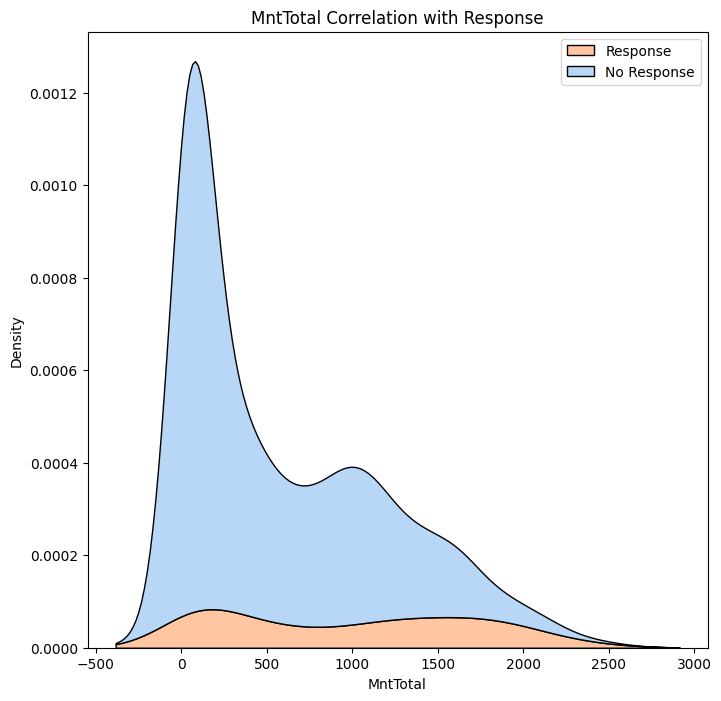

Correlation % for MntTotal: 26.46%
------------------------------------------------------------------------
count    2213.000000
mean      607.021690
std       602.488663
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: MntTotal, dtype: float64


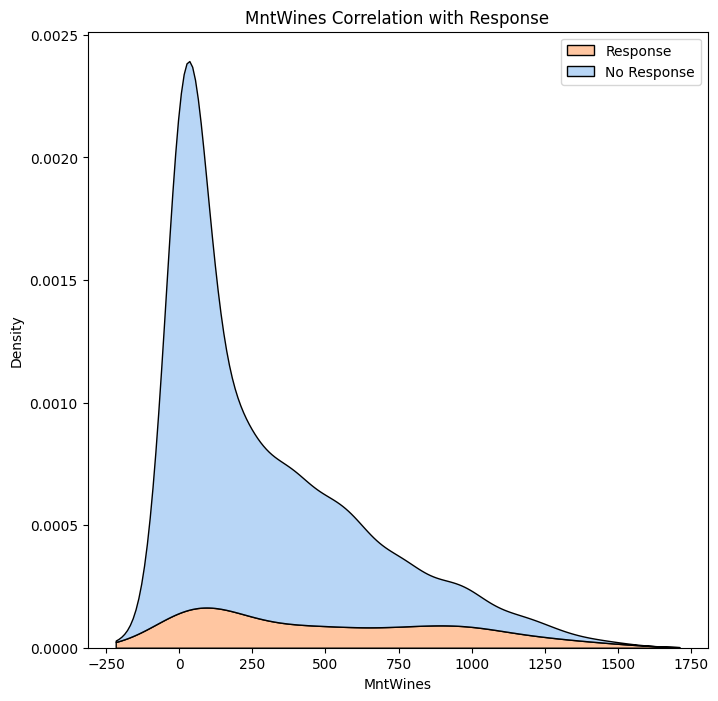

Correlation % for MntWines: 24.64%
------------------------------------------------------------------------
count    2213.000000
mean      305.153638
std       337.305490
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64


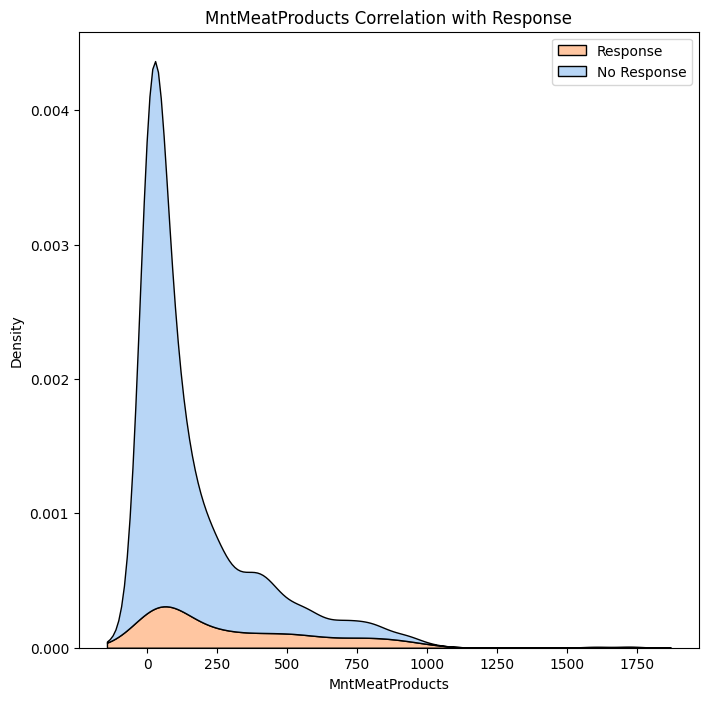

Correlation % for MntMeatProducts: 23.81%
------------------------------------------------------------------------
count    2213.000000
mean      166.962494
std       224.226178
min         0.000000
25%        16.000000
50%        68.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


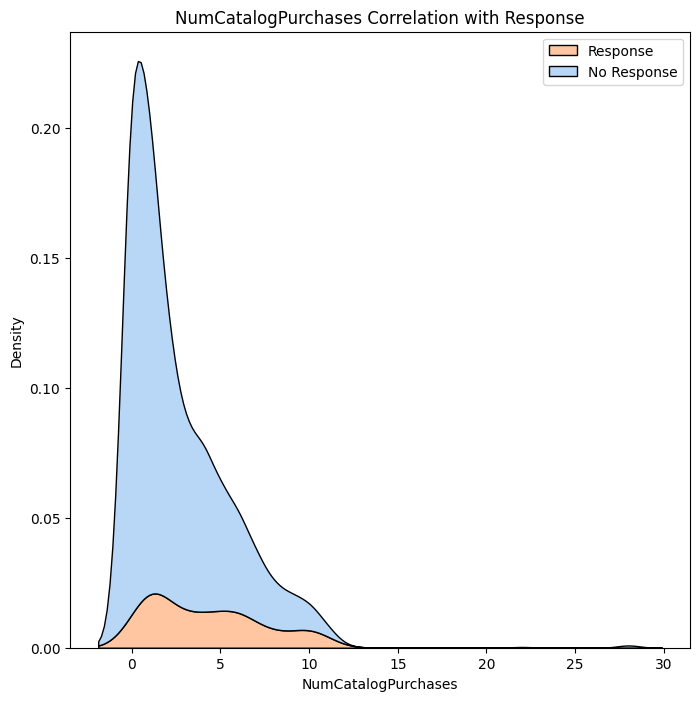

Correlation % for NumCatalogPurchases: 22.0%
------------------------------------------------------------------------
count    2213.000000
mean        2.671487
std         2.927096
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


In [24]:
# Select only numerical features (excluding the 'Response' column itself)
numerical_features = raw_data.select_dtypes(include=['number']).columns.tolist()

# Ensure that 'Response' is part of the numerical features before calculating correlation
if 'Response' in numerical_features:
    # Calculate absolute correlation with response
    response_corr = raw_data[numerical_features].corr()['Response'].abs()
    
    # Remove 'Response' from the correlation series itself to avoid plotting it
    response_corr_abs = response_corr.drop('Response').sort_values(ascending=False)
else:
    print("The 'Response' column is not numeric or is missing.")
    response_corr = pd.Series()  # Create an empty series to avoid errors later

# Create function to display KDE plots
def display_kdeplot(df, col1, col2):
    plt.figure(figsize=(8, 8))
    sns.kdeplot(data=df, x=col1, hue=col2, multiple="stack", palette='pastel')
    plt.title(f'{col1} Correlation with {col2}')
    plt.legend(['Response', 'No Response'])
    plt.xlabel(col1)
    plt.ylabel('Density')
    plt.show()  # Show the plot for each feature

# Iterate over the top 5 numerical features with highest correlation to Response
for i in range(min(5, len(response_corr_abs))):  # Ensure we don't exceed available features
    feature_name = response_corr_abs.index[i]
    display_kdeplot(raw_data, feature_name, 'Response')
    print(f'Correlation % for {feature_name}: {round(response_corr[feature_name] * 100, 2)}%')
    print('------------------------------------------------------------------------')
    print(raw_data[feature_name].describe())


PRE-PROCESSING 

In [25]:
df = raw_data.copy()

In [26]:
raw_data.columns

Index(['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Country', 'Customer_Age',
       'Customer_Enrollment_Days', 'Marital_Status_Mapped', 'Family_Size',
       'MntTotal', 'TotalPurchases', 'Num_Accepted', 'Campaign_Engagement'],
      dtype='object')

In [27]:
raw_data.drop(columns=['ID','Response'], inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                      'NumWebVisitsMonth', 'Customer_Age', 'Customer_Enrollment_Days', 
                      'MntTotal', 'TotalPurchases']

categorical_features = ['Education', 'Country', 'Campaign_Engagement']

binary_features = ['Complain', 'Marital_Status_Mapped', 'Num_Accepted']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(drop='first'), categorical_features), 
        ('bin', 'passthrough', binary_features) 
    ]
)

raw_data_encoded = preprocessor.fit_transform(raw_data)

num_features = numerical_features
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
bin_features = binary_features

all_feature_names = pd.Index(num_features + cat_features.tolist() + bin_features)

raw_data_encoded_df = pd.DataFrame(raw_data_encoded, columns=all_feature_names)

KMeans Clustering

In [29]:
X_train = raw_data_encoded  

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans = kmeans.fit(X_train)

print("The clusters are: ", kmeans.labels_)

print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [2 1 3 ... 4 2 0]
The Inertia is:  23955.938336816736


In [30]:
no_of_clusters = range(2, 11)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=42, n_init=10)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for", f, "Clusters is:", u)


The inertia for 2 Clusters is: 29148.80441920801
The inertia for 3 Clusters is: 25969.860423781935
The inertia for 4 Clusters is: 24894.099100492214
The inertia for 5 Clusters is: 23955.938336816736
The inertia for 6 Clusters is: 23132.249487130444
The inertia for 7 Clusters is: 22356.836069014375
The inertia for 8 Clusters is: 21835.51897680926
The inertia for 9 Clusters is: 21252.75808091231
The inertia for 10 Clusters is: 20861.236349301507


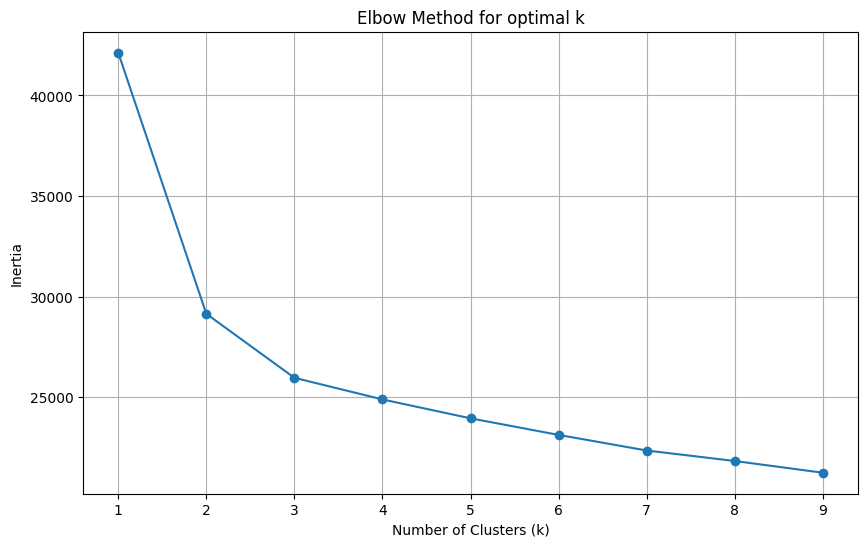

In [31]:
inertia_values = []
for n in range(1,10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),inertia_values, marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Running Kmeans with 3 clusters

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = kmeans.fit(X_train)


kmeans.labels_

predictions = kmeans.predict(raw_data_encoded)

unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,600,597,1016


In [33]:
kmeans.labels_

array([1, 0, 2, ..., 2, 1, 1])

In [34]:
predictions

array([1, 0, 2, ..., 2, 1, 1])

PRINCIPAL COMPONENT ANALYSIS

Explained variance ratio (first two components): [0.38587662 0.10411993]


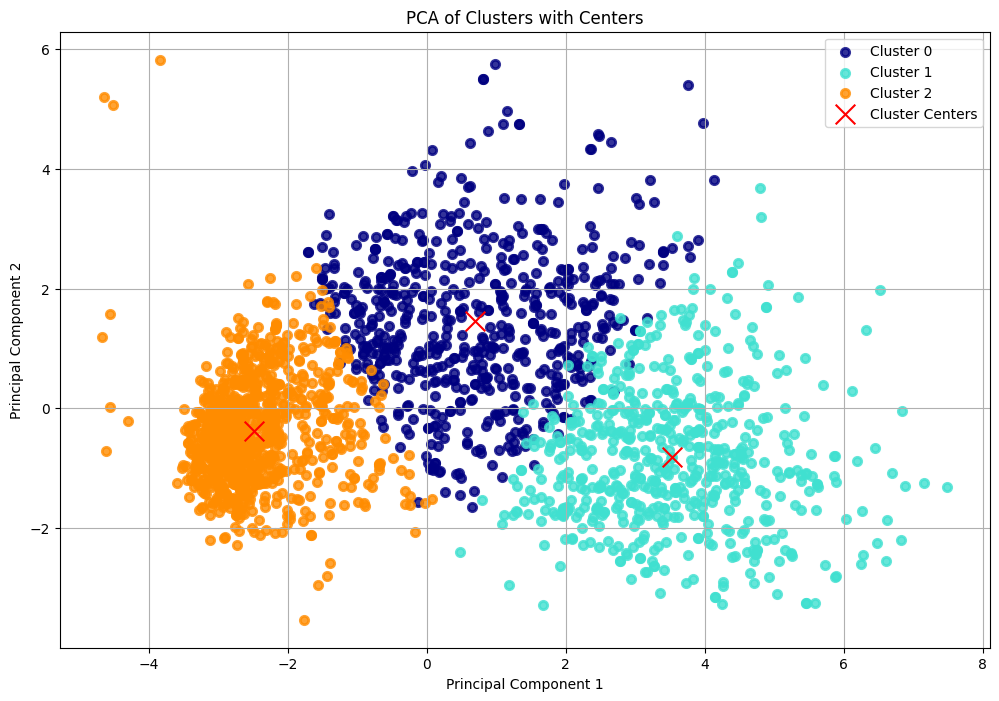

In [35]:
X = X_train
y_num = predictions
target_names = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each component
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Adding cluster centers to the plot
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Clusters with Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


Original shape of X: (2213, 33)
Total Variance in our dataset is:  19.043251124172546
The 95% variance we want to have is:  18.09108856796392

Variance explained with 18 components:  18.218223638716864


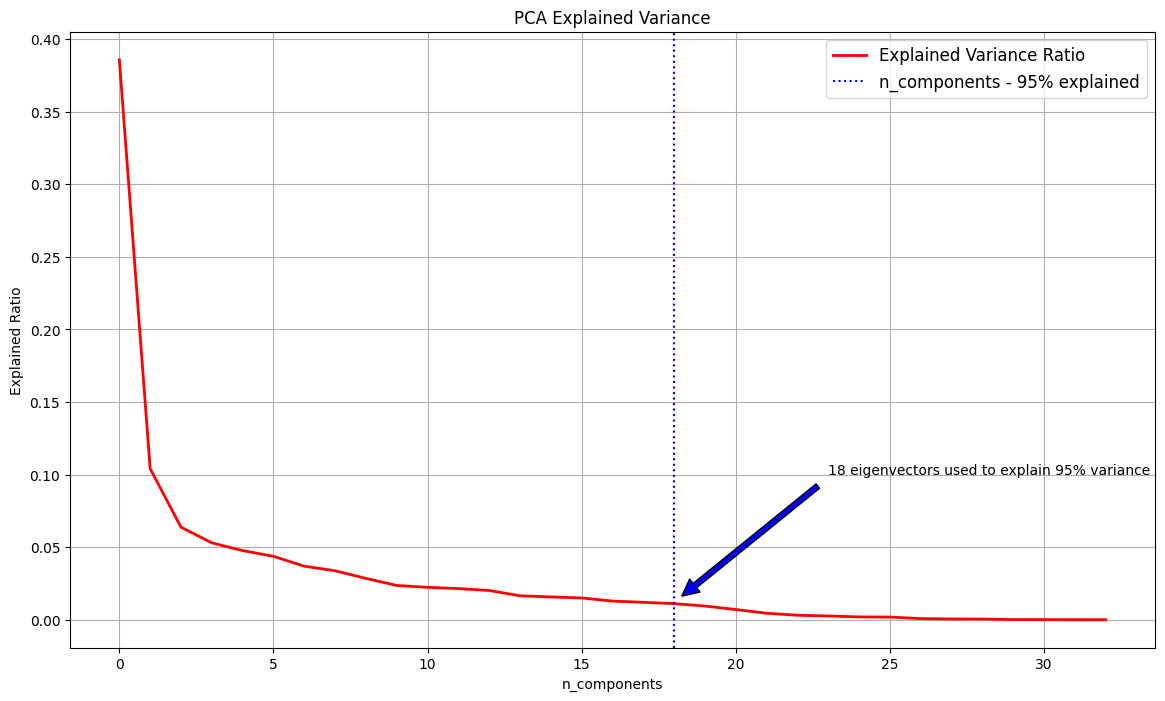

In [36]:
print("Original shape of X:", X.shape)

# Determine the number of components
n_components = X.shape[1]

# Run PCA with all components
pca = PCA(n_components=n_components, random_state=453)
X_r = pca.fit_transform(X)

# Calculate the total variance and the 95% threshold
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a DataFrame with PCA components and explained variance
explained_variance_df = pd.DataFrame({
    "PCA Comp": range(1, n_components + 1),
    "Explained Variance": pca.explained_variance_
})

# Calculate cumulative explained variance
explained_variance_df['Cumulative Variance'] = explained_variance_df['Explained Variance'].cumsum()

# Check the number of components needed for 95% variance
components_to_explain_95 = np.argmax(explained_variance_df['Cumulative Variance'] >= 0.95 * total_variance) + 1

# Print variance explained by components
print(f"Variance explained with {components_to_explain_95} components: ", explained_variance_df['Cumulative Variance'][components_to_explain_95 - 1])

# Plotting the Explained Variance Ratio
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, color="r", label='Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('Explained Ratio')

# Plotting a vertical line for the 95% explained variance
plt.axvline(components_to_explain_95, linestyle=':', label='n_components - 95% explained', color="blue")
plt.legend(prop=dict(size=12))

plt.annotate(f'{components_to_explain_95} eigenvectors used to explain 95% variance', 
             xy=(components_to_explain_95, pca.explained_variance_ratio_[components_to_explain_95-1]),
             xytext=(components_to_explain_95 + 5, 0.1),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [37]:
# Use PCA reduced data
X_reduced = X_r[:, :18]  # Select the first 18 PCA components

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)

# Get labels and inertia
predictions = kmeans.labels_
inertia = kmeans.inertia_

# Print results
print("The clusters are: ", predictions)
print("The Inertia is: ", inertia)

# Calculating the Counts of the clusters
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1, 3)

# Creating a DataFrame with cluster counts
countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2"])

# Display counts DataFrame
print(countscldf)


The clusters are:  [2 1 0 ... 0 2 2]
The Inertia is:  24145.402406951747
   Cluster 0  Cluster 1  Cluster 2
0       1016        602        595


In [38]:
pca = PCA(n_components=18, random_state=42)
X_reduced = pca.fit_transform(raw_data_encoded)  # Apply PCA
print(f"Explained variance ratio (total): {sum(pca.explained_variance_ratio_)}")


Explained variance ratio (total): 0.9566761221560312


In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
predictions = kmeans.fit_predict(X_reduced)  # Cluster assignments on reduced data
inertia = kmeans.inertia_
print(f"The clusters are: {predictions}")
print(f"The Inertia is: {inertia}")


The clusters are: [2 1 0 ... 0 2 2]
The Inertia is: 24145.402406976802


In [40]:
# Add the cluster labels to the DataFrame
raw_data_encoded_df['Cluster'] = predictions

# Group by clusters and calculate the mean of each feature
cluster_means = raw_data_encoded_df.groupby('Cluster').mean()

# Display the results
pd.set_option('display.max_columns', None)
print(cluster_means)


           Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster                                                             
0       -0.682797  0.014939 -0.785019  -0.538721        -0.646538   
1        0.173913 -0.055779  0.423199  -0.149402        -0.170380   
2        0.989960  0.030925  0.912292   1.071060         1.276388   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0              -0.561356         -0.533970     -0.555955          -0.194171   
1              -0.182993         -0.159454      0.288381           0.784076   
2               1.143697          1.073116      0.657555          -0.461742   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0              -0.743318            -0.723527          -0.802578   
1               0.827355             0.086146         

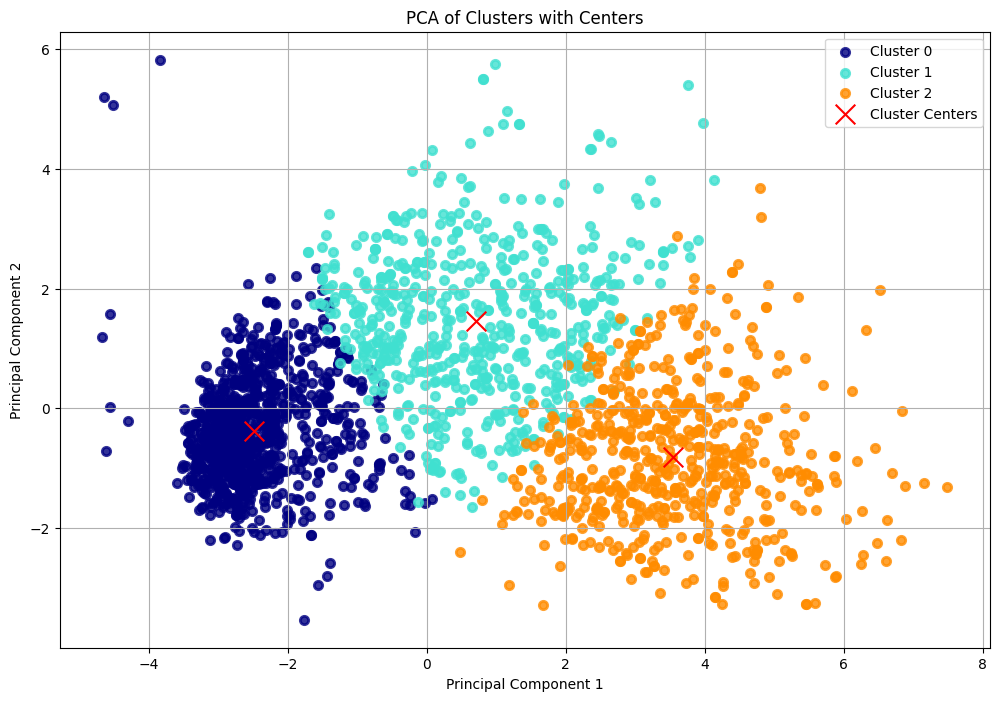

In [41]:
# Using PCA to reduce to 2 components f
pca_vis = PCA(n_components=2, random_state=42)
X_r_vis = pca_vis.fit_transform(X_reduced)

# Get cluster centers in the 2D PCA space
cluster_centers = kmeans.cluster_centers_  
centers_2d = pca_vis.transform(cluster_centers) 

# Plotting
plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise', 'darkorange']
target_names = ["Cluster 0", "Cluster 1", "Cluster 2"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r_vis[predictions == i, 0], X_r_vis[predictions == i, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

# Plotting the cluster centers
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Adding title and labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Clusters with Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

plt.show()


In [42]:
#adding the cluster column to the original dataset
df['Cluster'] = predictions  

# creating a cluster category with descriptive names
df['Cluster Category'] = 'No Data' 
df.loc[df['Cluster'] == 0, 'Cluster Category'] = 'Cluster 1'
df.loc[df['Cluster'] == 1, 'Cluster Category'] = 'Cluster 2'
df.loc[df['Cluster'] == 2, 'Cluster Category'] = 'Cluster 3'

df.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Customer_Age,Customer_Enrollment_Days,Marital_Status_Mapped,Family_Size,MntTotal,TotalPurchases,Num_Accepted,Campaign_Engagement,Cluster,Cluster Category
0,1826,Graduation,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,Spain,54,3774,1,1,1190,15,0,Not Engaged,2,Cluster 3
1,1,Graduation,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,Canada,63,3775,1,1,577,18,1,Not Engaged,1,Cluster 2
2,10476,Graduation,67267.0,0,134,11,59,15,2,30,1,3,2,5,2,0,0,USA,66,3808,2,3,251,11,0,Not Engaged,0,Cluster 1
3,1386,Graduation,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,0,0,Australia,57,3810,2,4,11,4,0,Not Engaged,0,Cluster 1
4,5371,Graduation,21474.0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,Spain,35,3843,1,2,91,8,1,Not Engaged,0,Cluster 1


In [43]:
# Exporting the data in a CSV
file_path = 'customer_personality_cluster_output.csv'

# Save the DataFrame
df.to_csv(file_path, sep='\t', index=False) 

current_directory = os.getcwd()
print("File saved to:", os.path.join(current_directory, file_path))


File saved to: C:\Users\Cate\customer_personality_cluster_output.csv
